<center><h1> <font color="blue">Prédiction et classification du cancer du sein</font></h1></center>

### 1. Importation des bibliothèques

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### 2. Lecture des données

In [11]:
data = pd.read_csv ("breast-cancer.csv")
data.head ()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


### 3. Analyse exploratoire

In [12]:
print("Dimension des données:", data.shape)

Dimension des données: (569, 6)


In [13]:
print(f"Type des données :\n{data.dtypes}")

Type des données :
mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object


In [14]:
print(f"Nombre de valeurs manquantes par colonnes : \n{(data.isna().sum())}")

Nombre de valeurs manquantes par colonnes : 
mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64


In [15]:
print("Statistique descriptive :\n")
data.describe()

Statistique descriptive :



,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


#### Récapitulatif :
#### 3.1 Variabe à prédire : _diagnosis_
#### 3.2 Dimensions:
    - Nombre de lignes : 569
    - Nombre de colonnes : 6
#### 3.3 Types de données
    - features (mean_radius, mean_texture,..., mean_smoothness) : float64
    - target (diagnosis) : int64
#### 3.4 Valeurs manquantes
    - Aucune : étant donné qu'il y a aucune valeur manquante, on ne fera pas un nettoyage de données.

### Distribution de la variable cible : diagnosis

In [16]:
print("Distribution de la variable cible :\n")
data["diagnosis"].value_counts()

Distribution de la variable cible :



1    357
0    212
Name: diagnosis, dtype: int64

### 4. Visualisation de données initiales:

/tmp/ipykernel_27979/878797511.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist (ax=axe, layout=(2,3),alpha=0.5, label='x', color='blue')


array([[<Axes: title={'center': 'mean_radius'}>,
        <Axes: title={'center': 'mean_texture'}>,
        <Axes: title={'center': 'mean_perimeter'}>],
       [<Axes: title={'center': 'mean_area'}>,
        <Axes: title={'center': 'mean_smoothness'}>,
        <Axes: title={'center': 'diagnosis'}>]], dtype=object)

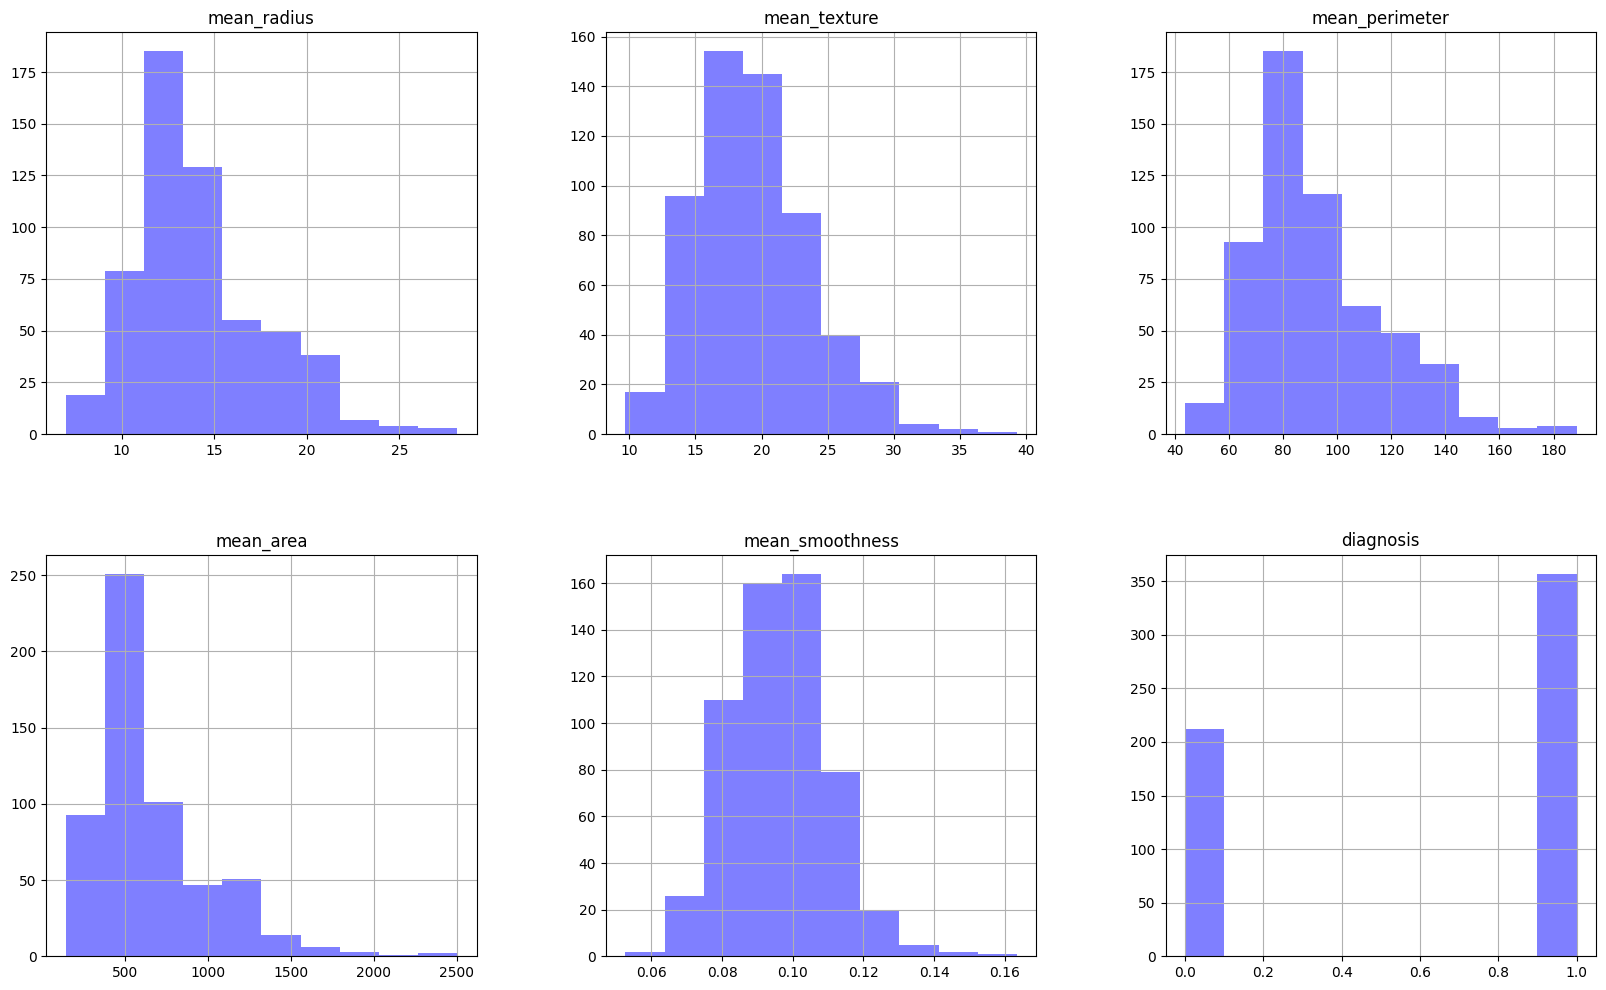

In [21]:
fig, axe=plt.subplots(figsize =(20,12))
data.hist (ax=axe, layout=(2,3),alpha=0.5, label='x', color='blue')

### 5. Normalisation des données:

#### Matrice de corrélation:

In [22]:
data.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


#### Normalisation:

In [25]:
features=['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']
data[features]=(data[features]-data[features].mean())/data[features].std()
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,1.096100,-2.071512,1.268817,0.983510,1.567087,0
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,0
2,1.578499,0.455786,1.565126,1.557513,0.941382,0
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,0
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0
...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0
565,1.703356,2.083301,1.614511,1.722326,0.102368,0
566,0.701667,2.043775,0.672084,0.577445,-0.839745,0
567,1.836725,2.334403,1.980781,1.733693,1.524426,0


#### 5. Entraînement du modèle

#### Séparation des données
on recupère les features dans une variable X et le target(varaible à predire: diagnosis)  dans une Y.

In [34]:
X=data.drop('diagnosis', axis=1)
Y=data['diagnosis']

#### Diviser les données:
On divise les features en un ensemble d'entraînement et un autre de test, on en fait de même pour le target.

In [35]:
X_train,X_test,Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=42)

In [36]:
print("Dimension de X_train:", X_train.shape)
print("Dimension de X_test:", X_test.shape)
print("Dimension de Y_train:", Y_train.shape)
print("Dimension de Y_test:", Y_test.shape)

Dimension de X_train: (455, 5)
Dimension de X_test: (114, 5)
Dimension de Y_train: (455,)
Dimension de Y_test: (114,)
